In [14]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
filename = 'ovara-2022-09-05-gaussian-mass-prior/M2-0.4Msun/HIP67506_chain000.fits'
samples = fits.open(filename)
cols = samples[1].columns
cols

ColDefs(
    name = 'mpri'; format = '2000D'; unit = 'msun'
    name = 'msec0'; format = '2000D'; unit = 'msun'
    name = 'sau0'; format = '2000D'; unit = 'au'
    name = 'esino0'; format = '2000D'
    name = 'ecoso0'; format = '2000D'
    name = 'inc0'; format = '2000D'; unit = 'radians'
    name = 'asc0'; format = '2000D'; unit = 'radians'
    name = 'lam0'; format = '2000D'; unit = 'radians'
    name = 'jitter'; format = '2000D'; unit = 'm/s'
    name = 'lnp'; format = '2000D'
    name = 'plx_ML'; format = '2000D'; unit = 'arcsec'
    name = 'pmra_ML'; format = '2000D'; unit = 'arcsec/yr'
    name = 'pmdec_ML'; format = '2000D'; unit = 'arcsec/yr'
    name = 'chisq_sep'; format = '2000D'
    name = 'chisq_PA'; format = '2000D'
    name = 'chisq_H'; format = '2000D'
    name = 'chisq_HG'; format = '2000D'
    name = 'chisq_G'; format = '2000D'
    name = 'RV_ZP_0_ML'; format = '2000D'; unit = 'm/s'
)

In [2]:
data = samples[1].data
burn_in = 500


In [3]:
np.shape(data['msec0'])
np.shape(data['msec0'][0])

msec = np.array([])
for i in range(np.shape(data['msec0'])[0]):
    m = data['msec0'][i][burn_in:]
    msec = np.append(msec,m)
    

msec.shape

(150000,)

In [4]:
np.mean(msec),np.std(msec),np.mean(data['msec0']),np.std(data['msec0'])

(0.8143996948853834, 1.2246637704372179, 0.823070125484299, 1.1164180094571976)

In [5]:
np.mean(data['mpri']),np.std(data['mpri'])

(1.178789884975982, 0.2600483106374048)

In [6]:
np.median(data['mpri']),np.std(data['mpri'])

(1.1737946368581418, 0.2600483106374048)

In [7]:
h = np.histogram(data['mpri'].flatten(), bins = 300)

h[1][np.where(h[0] == np.max(h[0]))], h[1][np.where(h[0] == np.max(h[0]))[0] + 1]

(array([1.14142124]), array([1.16615753]))

In [9]:
tt = fits.open(filename)[1].data
logl = tt['lnp']
pa_data = (tt['asc0']*180/np.pi) % 360
ls180 = pa_data < 180
g180 = pa_data >= 180

print(np.max(logl[ls180]))  # the max log likelihood of all orbits with PA of ascending nodes < 180 degrees
print(np.max(logl[g180]))  # the max log likelihood of all orbits with PA of ascending nodes > 180 degrees

-39.39240641746798
-39.933518546151305


In [10]:
print(np.mean(data['msec0']),np.std(data['msec0']))
print(np.mean(data['mpri']),np.std(data['mpri']))

0.823070125484299 1.1164180094571976
1.178789884975982 0.2600483106374048


# Without mass priors

0.696833243925613 1.3420724380499804
3.035687046554824 2.9673637511518


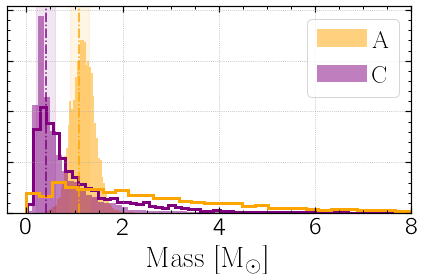

In [16]:
filename = 'ovara-2022-09-05-unif-mass-prior/HIP67506_chain000.fits'
samples = fits.open(filename)
data2 = samples[1].data

print(np.median(data2['msec0']),np.std(data2['msec0']))
print(np.mean(data2['mpri']),np.std(data2['mpri']))

h = np.histogram(data2['msec0'].flatten(),bins=200)
#print(h[0])

%matplotlib inline
plt.hist(data['mpri'].flatten(),bins=200,alpha=0.5,color='orange',density=True, label='A')

plt.hist(data['msec0'].flatten(),bins=200,alpha = 0.5,color='purple',density=True, label='C')

plt.axvline(x=1.1, color='orange', ls='-.')
plt.axvspan(1.1-0.2,1.1+0.2, color='orange',alpha=0.1)

plt.axvline(x=0.4, color='purple', ls='-.')
plt.axvspan(0.4-0.2,0.4+0.2, color='purple',alpha=0.1)

plt.hist(data2['msec0'].flatten(),bins=200,edgecolor='purple',facecolor="None",histtype='step',density=True,
        lw=3)

plt.hist(data2['mpri'].flatten(),bins=200,edgecolor='orange',facecolor="None",histtype='step',density=True,
        lw=3)



plt.gca().set_yticklabels([])
plt.xlim(right=8.0,left=-0.4)
plt.xlabel('Mass [M$_\odot$]',fontsize=30)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.grid(ls=':')
plt.tight_layout()
#plt.savefig('Figure12.png',dpi=300, bbox_inches='tight')
plt.show()

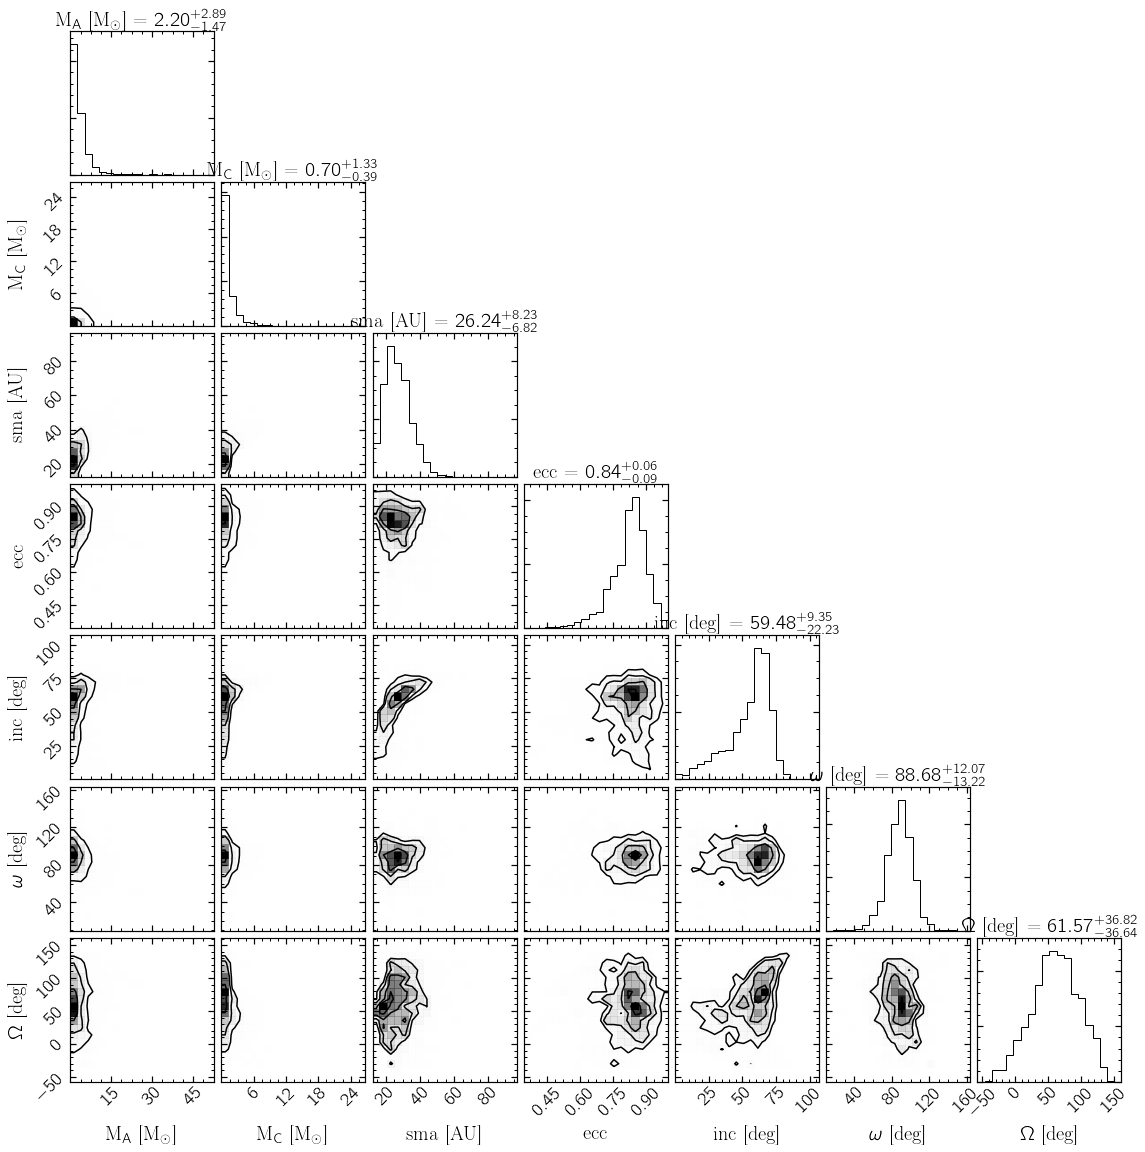

In [17]:
mpri = data2['mpri'].flatten()
msec = data2['msec0'].flatten()
lnp = data2['lnp'].flatten()
sma = data2['sau0'].flatten()
esino = data2['esino0'].flatten()
ecoso = data2['ecoso0'].flatten()
inc = np.degrees(data2['inc0'].flatten()) % 360
lan = np.degrees(data2['asc0'].flatten()) 
lam = data2['lam0'].flatten()

ecc = np.sqrt(esino**2 + ecoso**2)
argp = np.degrees(np.arctan(esino/ecoso)) % 180
M = lam - argp - lan
tau = M / (2*np.pi)

ecc,argp,M

import corner
%matplotlib inline
filename = 'ovara/ovara-2022-09-05-unif-mass-prior/HIP67506_chain000.fits'
params = np.array([mpri,msec,sma,ecc,inc,argp,lan])
labels = np.array(['M$_\mathrm{A}$ [M$_\odot$]','M$_\mathrm{C}$ [M$_\odot$]','sma [AU]', 'ecc', 'inc [deg]',
                  '$\omega$ [deg]', '$\Omega$ [deg]'])
titles = np.array(['M$_\mathrm{A}$','M$_\mathrm{C}$','sma', 'ecc', 'inc',
                  '$\omega$', '$\Omega$'])
figure = corner.corner(params.T, labels=labels, titles = titles, show_titles=True, plot_datapoints=False,
                      fontsize=25)
#figure.savefig('SupplementalFigure2.png',dpi=300, bbox_inches='tight')

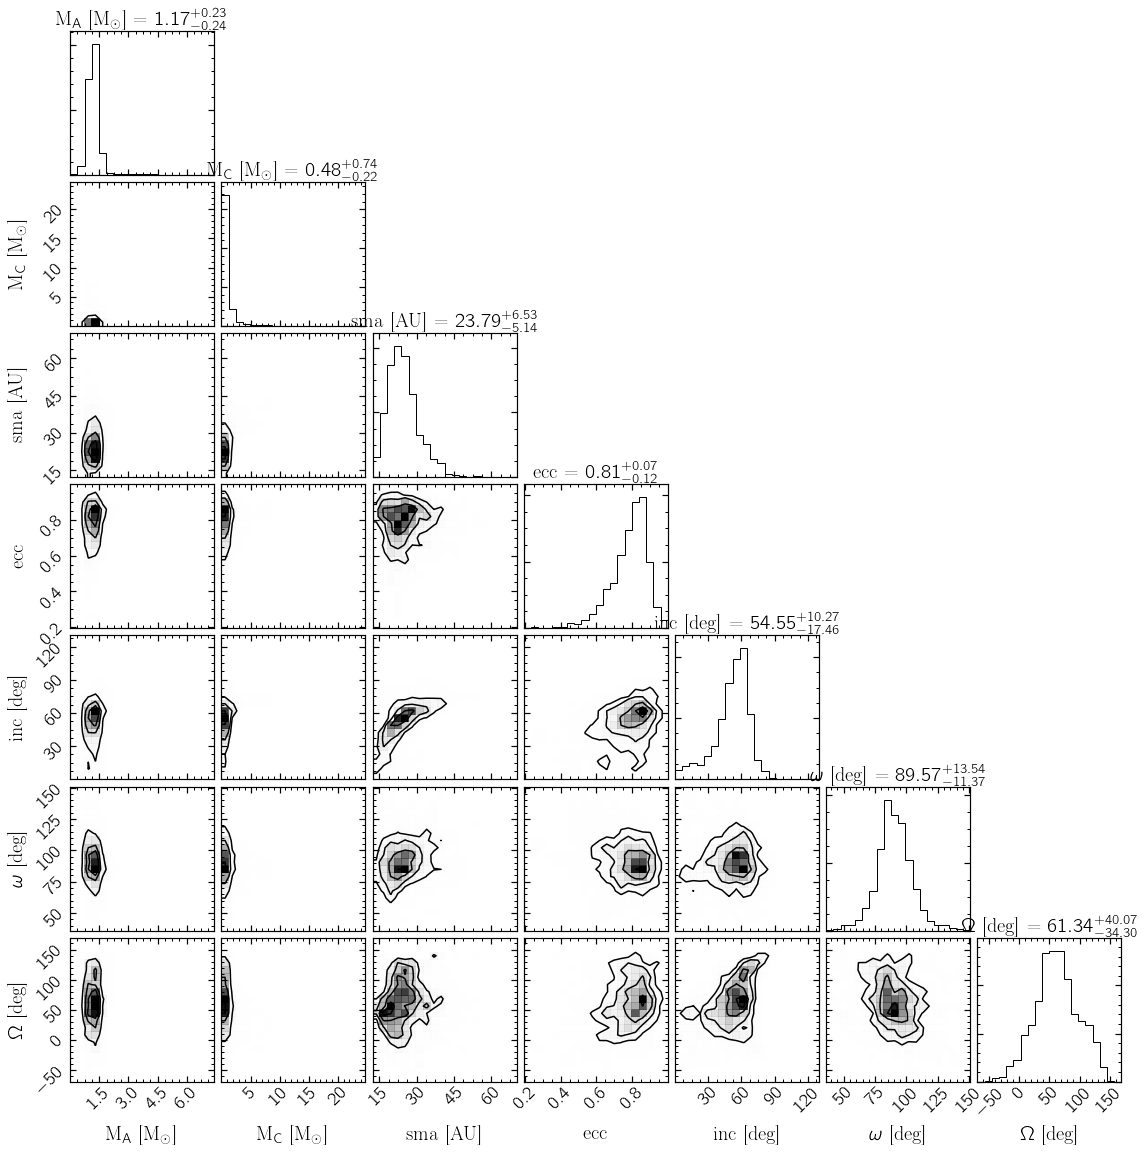

In [19]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
#mpl.rcParams['axes.grid.linestyle'] = ':'

mpri = data['mpri'].flatten()
msec = data['msec0'].flatten()
lnp = data['lnp'].flatten()
sma = data['sau0'].flatten()
esino = data['esino0'].flatten()
ecoso = data['ecoso0'].flatten()
inc = np.degrees(data['inc0'].flatten()) % 360
lan = np.degrees(data['asc0'].flatten()) 
lam = data['lam0'].flatten()

ecc = np.sqrt(esino**2 + ecoso**2)
argp = np.degrees(np.arctan(esino/ecoso)) % 180
M = lam - argp - lan
tau = M / (2*np.pi)

ecc,argp,M

import corner

filename = 'ovara/ovara-2022-09-05-gaussian-mass-prior/M2-0.4Msun/HIP67506_chain000.fits'
params = np.array([mpri,msec,sma,ecc,inc,argp,lan])
labels = np.array(['M$_\mathrm{A}$ [M$_\odot$]','M$_\mathrm{C}$ [M$_\odot$]','sma [AU]', 'ecc', 'inc [deg]',
                  '$\omega$ [deg]', '$\Omega$ [deg]'])
titles = np.array(['M$_\mathrm{A}$','M$_\mathrm{C}$','sma', 'ecc', 'inc',
                  '$\omega$', '$\Omega$'])
figure = corner.corner(params.T, labels=labels, titles = titles, show_titles=True, plot_datapoints=False,
                      fontsize=25)
#figure.savefig('SupplementalFigure3.png',dpi=300, bbox_inches='tight')